In [1]:
import matplotlib
import pandas as pd
import numpy as np
import numpy.linalg as LA
from scipy import stats
import math
import numpy.ma as ma
import matplotlib.pyplot as plt
import numpy.ma as ma
from pathlib import Path
import sys
import qualities
import plotting_func
import glob

In [2]:
files = glob.glob("./outputs/*")
print(files)

['./outputs\\old', './outputs\\old2', './outputs\\results-06-17-2021_14-31-15-NATST-cifar10-200.csv', './outputs\\results-06-17-2021_14-34-36-NATST-cifar10-12.csv', './outputs\\results-06-17-2021_14-34-36-NATST-cifar100-200.csv', './outputs\\results-06-17-2021_15-19-16-NATST-cifar100-12.csv', './outputs\\results-06-17-2021_15-53-47-NATST-ImageNet16-120-12.csv', './outputs\\results-06-17-2021_15-57-17-NATST-ImageNet16-120-200.csv', './outputs\\results-06-18-2021_17-26-15-NATSS-cifar10-12.csv', './outputs\\results-06-18-2021_17-27-02-NATSS-cifar10-90.csv', './outputs\\results-06-18-2021_17-27-41-NATSS-cifar100-12.csv', './outputs\\results-06-18-2021_17-28-21-NATSS-cifar100-90.csv']


In [4]:
files = glob.glob("./outputs/*")
print(files)
#print(len(files))
models = ['NATST','NATSS']

file12 = {}
file90 = {}
results12 = {}
results90 = {}
sorted_dict12 = {}
sorted_dict90 = {}
plot12 = {}
plot90 = {}
title = {}

for model in models:
    datasets = ['cifar10','cifar100']

    file12[model] = {}
    file90[model] = {}
    results12[model] = {}
    results90[model] = {}
    sorted_dict12[model] = {}
    sorted_dict90[model] = {}
    plot12[model] = {}
    plot90[model] = {}
    title[model] = {}

    for dataset in datasets:
        for x in files:
            if(dataset + "-" in x and model in x and "-12.csv" in x):
                file12[model][dataset] = x
                print(x)
            if(dataset + "-" in x and model in x and "-200.csv" in x):
                file90[model][dataset] = x
                print(x)
            if(dataset + "-" in x and model in x and "-90.csv" in x):
                file90[model][dataset] = x
                print(x)


        #print(results12)

        results12[model][dataset] = qualities.correlate(file12[model][dataset].split(os.sep)[-1][0:-4])
        sorted_dict12[model][dataset] = results12[model][dataset]["pearson"]
        

        results90[model][dataset] = qualities.correlate(file90[model][dataset].split(os.sep)[-1][0:-4])
        sorted_dict90[model][dataset] = results90[model][dataset]["pearson"]

        '''
        after_process = ["0", "1", "2", "3", "4", "5", "6", "7"]
        sorted_dict12[dataset], title[dataset] = plotting_func.rename_dict(sorted_dict12[dataset], after_process[6], "gap") #"test", "gap"
        sorted_dict90[dataset], title[dataset] = plotting_func.rename_dict(sorted_dict90[dataset], after_process[6], "gap") #"test", "gap"

        #Remove all agg methods except L2 and L3
        plot12[dataset] = {}
        plot90[dataset] = {}
        for x in sorted_dict90[dataset].keys():
            if("L2" in x or "L3" in x):
                plot12[dataset][x] = sorted_dict12[dataset][x]
                plot90[dataset][x] = sorted_dict90[dataset][x]
        '''

['./outputs\\old', './outputs\\old2', './outputs\\results-06-17-2021_14-31-15-NATST-cifar10-200.csv', './outputs\\results-06-17-2021_14-34-36-NATST-cifar10-12.csv', './outputs\\results-06-17-2021_14-34-36-NATST-cifar100-200.csv', './outputs\\results-06-17-2021_15-19-16-NATST-cifar100-12.csv', './outputs\\results-06-17-2021_15-53-47-NATST-ImageNet16-120-12.csv', './outputs\\results-06-17-2021_15-57-17-NATST-ImageNet16-120-200.csv', './outputs\\results-06-18-2021_17-26-15-NATSS-cifar10-12.csv', './outputs\\results-06-18-2021_17-27-02-NATSS-cifar10-90.csv', './outputs\\results-06-18-2021_17-27-41-NATSS-cifar100-12.csv', './outputs\\results-06-18-2021_17-28-21-NATSS-cifar100-90.csv']
./outputs\results-06-17-2021_14-31-15-NATST-cifar10-200.csv
./outputs\results-06-17-2021_14-34-36-NATST-cifar10-12.csv
zero models deleted: 342
15283
zero models deleted: 326
15299
./outputs\results-06-17-2021_14-34-36-NATST-cifar100-200.csv
./outputs\results-06-17-2021_15-19-16-NATST-cifar100-12.csv
zero mode

In [5]:
newgap90 = dict()
newgap12 = dict()
newtest90 = dict()
newtest12 = dict()
for model in models:
    newgap90[model] = dict()
    newgap12[model] = dict()
    newtest90[model] = dict()
    newtest12[model] = dict()
    for dataset in datasets:
        for x in results90[model][dataset]["pearson"]:
            if("gap" in x):
                if("QS" in x):
                    if("L3" in x and "_0" in x):
                        newgap90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                        newgap12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]
                elif("path" in x):
                    newgap90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                    newgap12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]  
                else:
                    if("L2" in x and "_6" in x):
                        newgap90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                        newgap12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]
            elif("test" in x):
                if("QS" in x):
                    if("L3" in x and "_0" in x):
                        newtest90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                        newtest12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]
                elif("path" in x):
                    newtest90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                    newtest12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]  
                else:
                    if("L2" in x and "_6" in x):
                        newtest90[model][x+"-"+dataset] = results90[model][dataset]["pearson"][x]
                        newtest12[model][x+"-"+dataset] = results12[model][dataset]["pearson"][x]

In [6]:
print(newtest12)

{'NATST': {'QS_BE_test_acc_L3_0-cifar10': 0.11750837577038888, 'QS_AE_test_acc_L3_0-cifar10': 0.006726725559588611, 'QE_BE_test_acc_L2_6-cifar10': 0.2971815433474353, 'QE_AE_test_acc_L2_6-cifar10': 0.25698028773365056, 'spec_BE_test_acc_L2_6-cifar10': 0.31814389602945764, 'spec_AE_test_acc_L2_6-cifar10': 0.6900350155041256, 'fro_BE_test_acc_L2_6-cifar10': 0.03684037830382454, 'fro_AE_test_acc_L2_6-cifar10': 0.650226910523078, 'path_test_acc-cifar10': 0.3174825976560254, 'QS_BE_test_acc_L3_0-cifar100': 0.1710367345748185, 'QS_AE_test_acc_L3_0-cifar100': 0.10870733838986357, 'QE_BE_test_acc_L2_6-cifar100': 0.2437982545074604, 'QE_AE_test_acc_L2_6-cifar100': 0.3919096918344174, 'spec_BE_test_acc_L2_6-cifar100': 0.4949481518483074, 'spec_AE_test_acc_L2_6-cifar100': 0.5554058627758223, 'fro_BE_test_acc_L2_6-cifar100': 0.23168368134083245, 'fro_AE_test_acc_L2_6-cifar100': 0.518686546837556, 'path_test_acc-cifar100': 0.1422229245308025}, 'NATSS': {'QS_BE_test_acc_L3_0-cifar10': 0.932016717973

In [7]:
def rename_dict(sorted_dict):
    #Renames dict to latex

    temp = {}
    for x in sorted_dict.keys():
        #print(x)
        #Translate Name to Latex
        name = '${'
        if('AE' in x):
            name += '\widehat{'
        elif('BE' in x):
            name += '{'
        if('QS' in x):
            name += 'Q}_{SQ}'
        elif('QE' in x):
            name += 'Q}_{E}'
        elif('fro' in x):
            name += 'Q}_{F}'
        elif('spec' in x):
            name += 'Q}_{S}'
        elif('path' in x):
            name += '{Q}_{P}'
        if('L1' in x):
            name += '^{L1}'
        elif('L2' in x):
            name += '^{L2}'
        elif('L3' in x):
            name += '^{p}'
        elif('L4' in x):
            name += '^{L4}'
        elif('L5' in x):
            name += '^{L5}'
        name += '}$'
        name += "-"+(x.split("-")[-1]).upper()
        #print(name)
        temp[name] = sorted_dict[x]

    return temp



In [8]:
for model in models:
    newgap12[model] = rename_dict(newgap12[model])
    newgap90[model] = rename_dict(newgap90[model])
    newtest12[model] = rename_dict(newtest12[model])
    newtest90[model] = rename_dict(newtest90[model])

labels = []
for x in newtest12[model].keys():
    labels.append(x.split('-')[0])
#labels.extend(labels)
print(labels)


['${{Q}_{SQ}^{p}}$', '${\\widehat{Q}_{SQ}^{p}}$', '${{Q}_{E}^{L2}}$', '${\\widehat{Q}_{E}^{L2}}$', '${{Q}_{S}^{L2}}$', '${\\widehat{Q}_{S}^{L2}}$', '${{Q}_{F}^{L2}}$', '${\\widehat{Q}_{F}^{L2}}$', '${{Q}_{P}}$', '${{Q}_{SQ}^{p}}$', '${\\widehat{Q}_{SQ}^{p}}$', '${{Q}_{E}^{L2}}$', '${\\widehat{Q}_{E}^{L2}}$', '${{Q}_{S}^{L2}}$', '${\\widehat{Q}_{S}^{L2}}$', '${{Q}_{F}^{L2}}$', '${\\widehat{Q}_{F}^{L2}}$', '${{Q}_{P}}$']


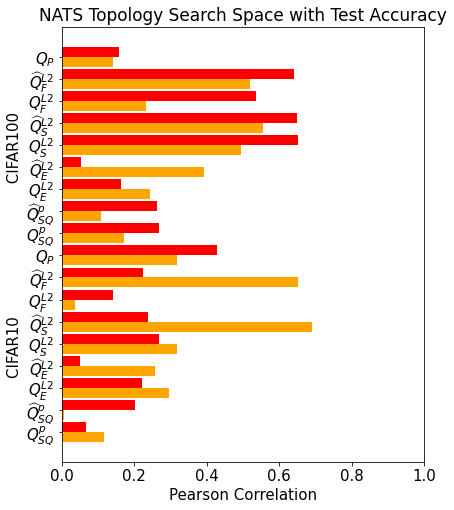

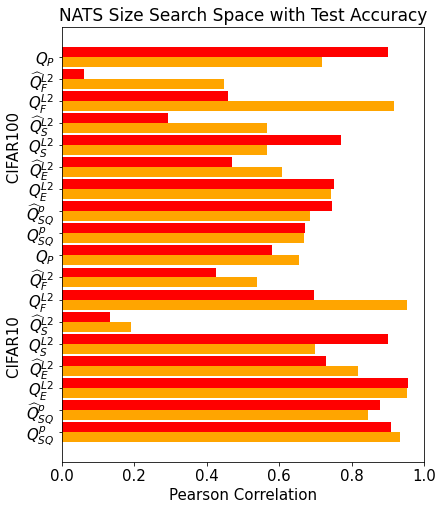

In [32]:
width = 0.45
x_size = 15
y_size = 15
title_size = 17
y_label = 'CIFAR10                            CIFAR100'
figsize=(6.5,8)

plt.figure(figsize=figsize)

model = 'NATST' #NATST, NATSS
x = np.arange(len(newtest90[model].values()))
plt.barh(x + width/2, newtest90[model].values(), width, label='200', color = "red")
plt.barh(x - width/2, newtest12[model].values(), width, label='12', color = "orange")
plt.yticks(x, labels = labels, fontsize = y_size)
plt.title("NATS Topology Search Space with Test Accuracy", fontsize = title_size)
plt.xlabel('Pearson Correlation', fontsize = x_size)
plt.ylabel(y_label, fontsize = y_size)
plt.xticks(fontsize = x_size)
plt.xlim([0, 1])
#plt.legend()
plt.savefig('figures/' + model[-1] + '_Test.png', dpi = 500)
plt.show()

model = 'NATSS'
plt.figure(figsize=figsize)

x = np.arange(len(newtest90[model].values()))
plt.barh(x + width/2, newtest90[model].values(), width, label='200', color = "red")
plt.barh(x - width/2, newtest12[model].values(), width, label='12', color = "orange")
plt.yticks(x, labels = labels, fontsize = y_size)
plt.title("NATS Size Search Space with Test Accuracy", fontsize = title_size)
plt.xlabel('Pearson Correlation', fontsize = x_size)
plt.ylabel(y_label, fontsize = y_size)

plt.xlim([0, 1])
plt.xticks(fontsize = x_size)

#plt.legend()
plt.savefig('figures/' + model[-1] + '_Test.png', dpi = 500)
plt.show()

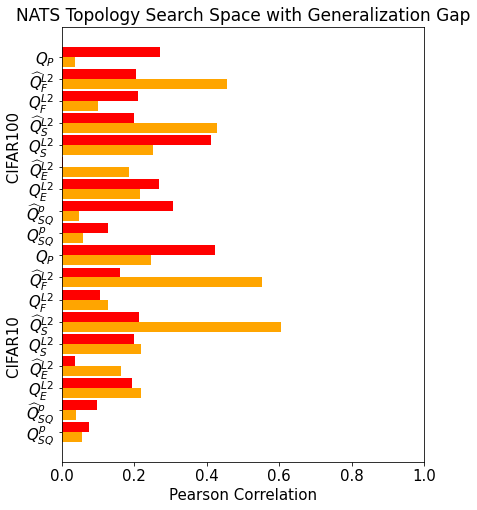

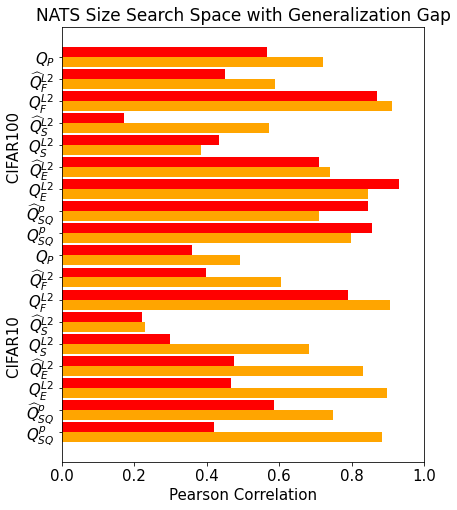

In [34]:
model = 'NATST'

plt.figure(figsize=figsize)

x = np.arange(len(newgap90[model].values()))
plt.barh(x + width/2, newgap90[model].values(), width, label='200', color = "red")
plt.barh(x - width/2, newgap12[model].values(), width, label='12', color = "orange")
plt.yticks(x, labels = labels, fontsize = y_size)
plt.title("NATS Topology Search Space with Generalization Gap", fontsize = title_size)
plt.xlabel('Pearson Correlation', fontsize = x_size)
plt.ylabel(y_label, fontsize = y_size)

plt.xlim([0, 1])
plt.xticks(fontsize = x_size)

#plt.legend()
plt.savefig('figures/' + model[-1] + '_Gap.png', dpi = 500)
plt.show()

model = 'NATSS'
plt.figure(figsize=figsize)

x = np.arange(len(newgap90[model].values()))
plt.barh(x + width/2, newgap90[model].values(), width, label='200', color = "red")
plt.barh(x - width/2, newgap12[model].values(), width, label='12', color = "orange")
plt.yticks(x, labels = labels, fontsize = y_size)
plt.title("NATS Size Search Space with Generalization Gap", fontsize = title_size)
plt.xlabel('Pearson Correlation', fontsize = x_size)
plt.ylabel(y_label, fontsize = y_size)

plt.xlim([0, 1])
plt.xticks(fontsize = x_size)

#plt.legend()
plt.savefig('figures/' + model[-1] + '_Gap.png', dpi = 500)
plt.show()

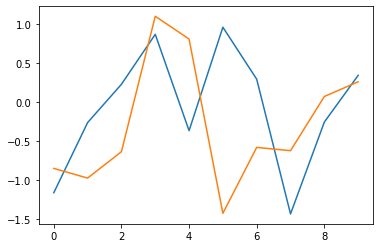

<Figure size 216x144 with 0 Axes>

In [28]:
#Legend

import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(3,2))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10))
figlegend.legend(lines, ('one', 'two'), 'center')
#fig.show()
#figlegend.show()
#figlegend.savefig('legend.png')

In [ ]:
for dataset in datasets:    
    x = np.arange(len(plot12[dataset].values()))  # the label locations
    width = 0.35  # the width of the bars
    #print(plot12[dataset])

    #fig, ax = plt.plot()
    plt.barh(x - width/2, plot12[dataset].values(), width, label='12', color = "orange")
    plt.barh(x + width/2, plot90[dataset].values(), width, label='90', color = "red")

    plt.xlabel('Pearson Correlation')
    plt.title(title[dataset], fontsize = 9)
    plt.yticks(x, labels = plot12[dataset].keys(), fontsize = 7)
    plt.legend()

    #fi.tight_layout()
    plt.savefig('figures/' + dataset + 'Gap_6.png', dpi=300)
    plt.show()

In [ ]:
#correlations['pearson'].keys()
sorted_values = sorted(results['pearson'].values()) # Sort the values
sorted_values.reverse()
sorted_dict = {}

for i in sorted_values:
    for k in results['pearson'].keys():
        if results['pearson'][k] == i:
            sorted_dict[k] = abs(results['pearson'][k])

number = 0 
n = '6'
for x in sorted_dict.keys():
    if('_' + n in x):
        number += 1
        #print(x)
print(number)
#print(sorted_dict.keys())

number = 0 
for x in results["pearson"].keys():
    if('_' + n in x):
        number += 1
        #print(x)
print(number)
#print(sorted_dict.keys())

In [ ]:
agg = ['L1', 'L2', 'L3', 'L4', 'L5']
aft = ['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7']
vss = ['test', 'gap']

for i in aft:
    for v in vss:
        #Create Temp Dict
        temp = {}
        for x in sorted_dict.keys():
            #print(x)
            if(("_" + i) in x and v in x):
                #Translate Name to Latex
                name = '${'
                if('AE' in x):
                    name += '\widehat{'
                elif('BE' in x):
                    name += '{'
                if('QS' in x):
                    name += 'Q}_{S}'
                elif('QE' in x):
                    name += 'Q}_{E}'
                elif('fro' in x):
                    name += '\mu}_{frob}'
                elif('spec' in x):
                    name += '\mu}_{spec}'
                if('L1' in x):
                    name += '^{L1}'
                elif('L2' in x):
                    name += '^{L2}'
                elif('L3' in x):
                    name += '^{L3}'
                elif('L4' in x):
                    name += '^{L4}'
                elif('L5' in x):
                    name += '^{L5}'

                name += '}$'
                #print(name)
                temp[name] = sorted_dict[x]

            #Create Title:
        if(v == 'test'):
            title = "Pearson Correlation of Metrics Alongside Test Accuracy "
        elif(v == 'gap'):
            title = "Pearson Correlation of Metrics Alongside Generalization Gap "
        title += "Using " + i + " Afterprocessing"

        #Plot
        matplotlib.rc('ytick', labelsize=3)
        matplotlib.rc('xtick', labelsize=10)
        plt.barh(range(len(temp)), list(temp.values()), align='center');
        #print(title, list(temp.keys()), len(list(temp.keys())))
        plt.yticks(range(len(temp)), list(temp.keys()),rotation='horizontal');    
        plt.title(title, fontsize = 7)
        plt.xlim([0,1])
        plt.show()

#Merics_Before/After EVBMF_Test / Gap_L1 to L5 (agg)_ (8 afterprocessing) (Only look at 0 and 7)
#4 x 2 x 5 x 8 = 320.
#Split by aft: 4 x 2 x 5 = 40 bars, 8 graphs

In [ ]:
print(sorted_dict.keys())